# FYSS5403 Homework 3, Otto Salmenkivi

## Excercise 1

We have a general state of N qubits
$
\sum_{k=1}^N a_k|k\rangle
$
to which we want to apply the inversion around the mean gate W, where $|\psi\rangle$ is the equal superposition of all states.
  
$
W = 2|\psi\rangle\langle\psi|-I = 2\left(\sum_{k=1}^{N}\frac{1}{\sqrt{N}}|k\rangle\right)\left(\sum_{k=1}^{N}\frac{1}{\sqrt{N}}\langle k|\right) - I
$
  
$
\begin{align}
W\sum_{k=1}^N a_k|k\rangle &= \left[2\left(\sum_{k=1}^{N}\frac{1}{\sqrt{N}}|k\rangle\right)\left(\sum_{k=1}^{N}\frac{1}{\sqrt{N}}\langle k|\right) - I\right] \sum_{k=1}^N a_k|k\rangle\\
&=\frac{2}{N}\sum_{k=1}^{N}|k\rangle\underbrace{\sum_{k=1}^{N}\langle k|\sum_{k=1}^{N}a_k|k\rangle}_\star - \sum_{k=1}^{N}a_k|k\rangle
\end{align}
$ 

Because of orthonormality, $\star$ is merely the sum of the coefficients $a_k$ of the general state. To distinguish it, let's call it $\sum_{i=1}^N a_i$. We get  
  
$
\begin{align}
W\sum_{k=1}^N a_k|k\rangle &=\sum_{k=1}^N \frac{2\sum_{i=1}^N a_i}{N}|k\rangle - \sum_{k=1}^N a_k|k\rangle\\
&= \sum_{k=1}^{N}\left[\frac{2\sum_{i=1}^N a_i}{N}|k\rangle - a_k|k\rangle\right]\\
&= \sum_{k=1}^{N}\left[\frac{2\sum_{i=1}^N a_i}{N} - a_k\right]|k\rangle
\end{align}
$

## Excercise 2

Let us build the circuits with the correct oracles and then run them using a simulator and the real hardware.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

/Applications/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


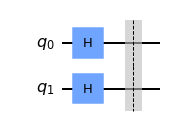

In [2]:
n = 2 #number of qubits
grover_circuit1 = QuantumCircuit(n)
for i in range(n):
    grover_circuit1.h(i)
grover_circuit1.barrier()
grover_circuit1.draw(output = 'mpl')


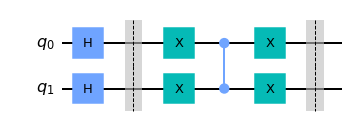

In [3]:
# Building an oracle that flags state 00
for i in range(n):
    grover_circuit1.x(i)
grover_circuit1.cz(0,1)
for i in range(n):
    grover_circuit1.x(i)
grover_circuit1.barrier()
grover_circuit1.draw(output = 'mpl')

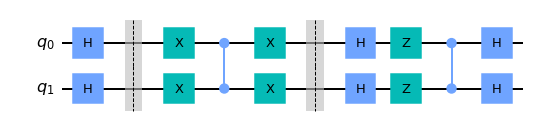

In [4]:
#Inversion around the mean gate for 2 qubit

grover_circuit1.h([0,1])
grover_circuit1.z([0,1])
grover_circuit1.cz(0,1)
grover_circuit1.h([0,1])
grover_circuit1.draw(output = 'mpl')

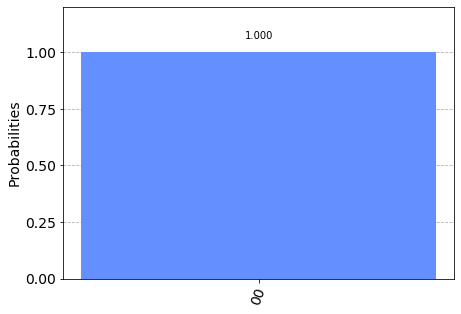

In [5]:
# lets simulate this grover_circuit1

# Statevector simulator for help when searching for the right oracle
    #statevector_simulator = Aer.get_backend('statevector_simulator')
    #sv_job = execute(grover_circuit1, backend = statevector_simulator)
    #statevector = job.result().get_statevector()
    #print(statevector)

# For simulating the real results we need something to measure

meas_circuit = QuantumCircuit(n,n)
for i in range(n):
    meas_circuit.measure(i,i)

# Now, let's simulate

simulator = provider.get_backend('ibmq_qasm_simulator')
shots = 1024
job = execute(grover_circuit1+meas_circuit, backend=simulator, shots = shots)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [6]:
# Algorithm for least busy from Moodle notes
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
qcomp = least_busy(small_devices)
print('The backend used is',qcomp)

The backend used is ibmqx2


Job Status: job has successfully run


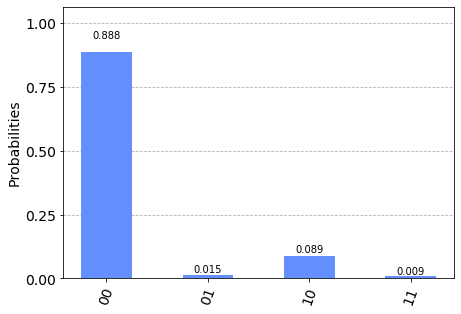

In [7]:
#Lets run the circuit on the IBMQ simulator

job = execute(grover_circuit1+meas_circuit, backend=qcomp, shots = shots)
job_monitor(job)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

The simulation and the real results agree, and the Grover algorithm is able to find the correct solution.  
Lets do the same experiment but for an oracle that flags states 00 and 11.

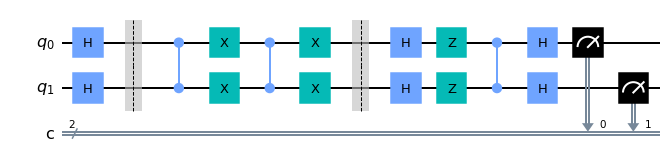

In [9]:
n = 2 #number of qubits
grover_circuit2 = QuantumCircuit(n)
for i in range(n):
    grover_circuit2.h(i)
grover_circuit2.barrier()

# Building an oracle that flags state 00 and 11
grover_circuit2.cz(1,0) # cz takes care of state 11

for i in range(n):
    grover_circuit2.x(i)
grover_circuit2.cz(0,1)
for i in range(n):
    grover_circuit2.x(i)
grover_circuit2.barrier()

#Inversion around the mean gate for 2 qubit
grover_circuit2.h([0,1])
grover_circuit2.z([0,1])
grover_circuit2.cz(0,1)
grover_circuit2.h([0,1])

grover_circuit2 += meas_circuit
grover_circuit2.draw(output = 'mpl')

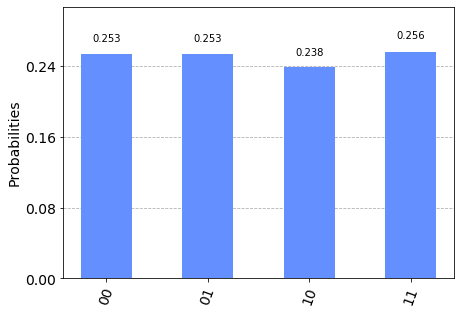

In [10]:
# First let simulate this circuit
job = execute(grover_circuit2, backend=simulator, shots = shots)
counts = job.result().get_counts()
plot_histogram(counts)

Job Status: job has successfully run


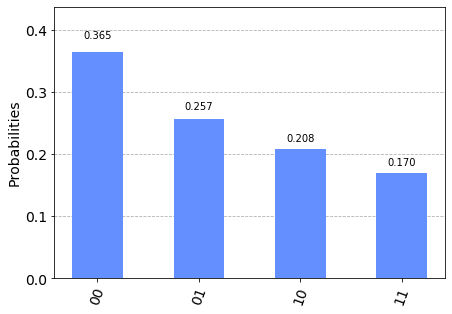

In [11]:
#And then run on real hardware
job = execute(grover_circuit2, backend=qcomp, shots = shots)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)

Clearly, Grover algorithm was not capable of finding the solutions (00 and 11).